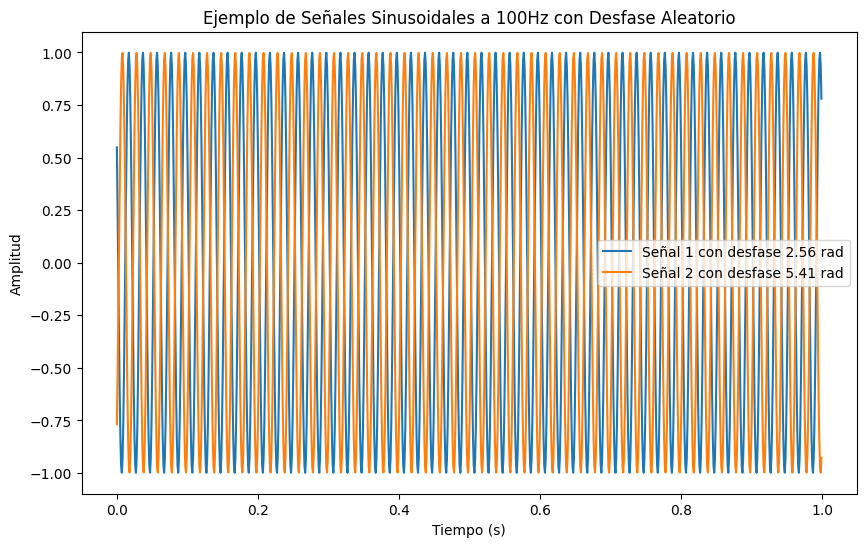

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
num_signals = 1000
fs = 1000  # Frecuencia de muestreo en Hz
f = 50    # Frecuencia de la señal en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

# Generar 1000 señales con desfase aleatorio
phase_shifts = np.random.uniform(0, 2*np.pi, num_signals)  # Desfases aleatorios
clean_signals = np.sin(2 * np.pi * f * t[:, None] + phase_shifts)

# Visualizar algunas de las señales
plt.figure(figsize=(10, 6))
for i in range(2):  # Mostrar solo 5 señales para evitar saturar la gráfica
    plt.plot(t, clean_signals[:, i], label=f'Señal {i+1} con desfase {phase_shifts[i]:.2f} rad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ejemplo de Señales Sinusoidales a 100Hz con Desfase Aleatorio')
plt.legend()
plt.show()

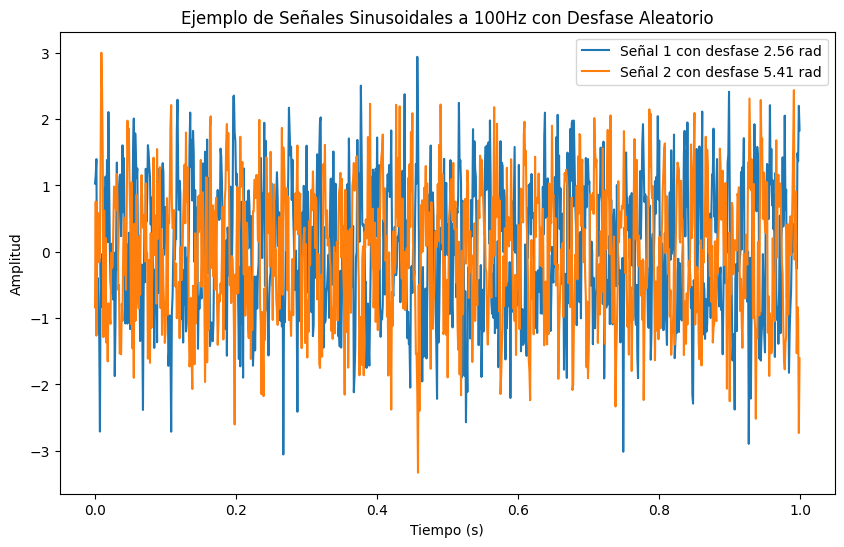

In [4]:
snr_db = 0  # Factor de ruido


signal_power = np.mean(clean_signals**2, axis=0)
noise_power = signal_power / (10**(snr_db / 10))

noisy_signals = clean_signals + np.random.normal(0, np.sqrt(noise_power), clean_signals.shape)

# División en datos de entrenamiento y de prueba
split_index = int(num_signals * 0.8)
x_train = noisy_signals[:, :split_index].T
y_train = clean_signals[:, :split_index].T
x_test = noisy_signals[:, split_index:].T
y_test = clean_signals[:, split_index:].T


plt.figure(figsize=(10, 6))
for i in range(2):  # Mostrar solo 5 señales para evitar saturar la gráfica
    plt.plot(t, noisy_signals[:, i], label=f'Señal {i+1} con desfase {phase_shifts[i]:.2f} rad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ejemplo de Señales Sinusoidales a 100Hz con Desfase Aleatorio')
plt.legend()
plt.show()

NNN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import pearsonr


model = Sequential([
    Dense(64, activation='relu', input_shape=(fs,)),
    Dense(64, activation='relu'),
    Dense(fs, activation='linear')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse')

# Resumen del modelo
#model.summary()

c:\Users\Guti\miniconda3\envs\neural_networks\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4594 - val_loss: 0.0892
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0566 - val_loss: 0.0289
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - val_loss: 0.0225
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0180
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - val_loss: 0.0166
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - val_loss: 0.0154
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - val_loss: 0.0145
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 0.0137
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0134
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0130
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0127
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_l

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 
Test loss: 0.008081432431936264
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


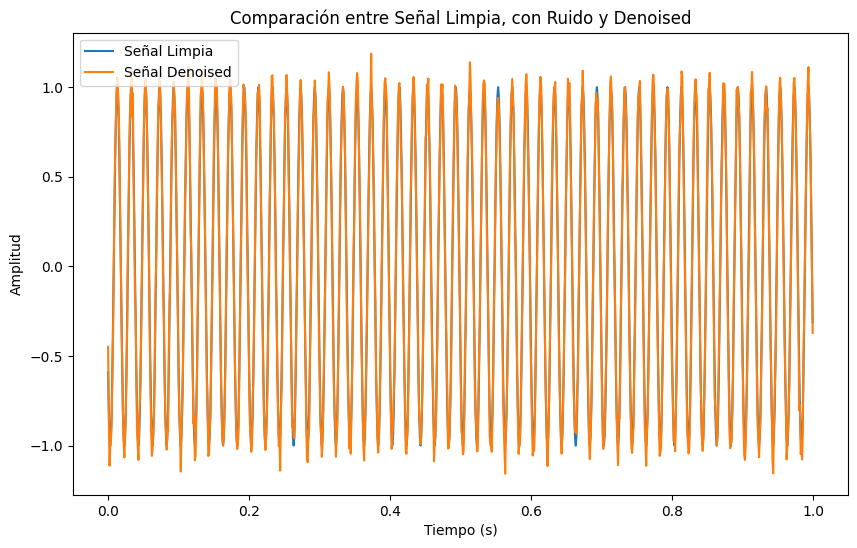

Average RMSE: 0.08554815888972865
Average Correlation: 0.9944029131325414


In [7]:
# Evaluación del modelo
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)

# Predicción de señales denoised
predicted_signals = model.predict(x_test)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, y_test[0], label='Señal Limpia')
#plt.plot(t, x_test[0], label='Señal con Ruido', alpha=0.5)
plt.plot(t, predicted_signals[0], label='Señal Denoised')
plt.legend()
plt.title('Comparación entre Señal Limpia, con Ruido y Denoised')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


rmses = []
correlations = []
for i in range(predicted_signals.shape[0]):
    rmse = np.sqrt(np.mean(np.power(y_test[i]-predicted_signals[i],2)))
    rmses.append(rmse)
    correlation, _ = pearsonr(y_test[i], predicted_signals[i])
    correlations.append(correlation)

# Calcular promedios
average_rmse = np.mean(rmses)
average_correlation = np.mean(correlations)

print(f'Average RMSE: {average_rmse}')
print(f'Average Correlation: {average_correlation}')




Recurrent:

In [8]:
from tensorflow.keras.callbacks import Callback
from tqdm import tqdm
#import tqdm

class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.bar = tqdm(total=self.params['epochs'] * self.params['steps'], desc='Training Progress', position=0, leave=True)

    def on_batch_end(self, batch, logs=None):
        self.bar.update(1)

    def on_train_end(self, logs=None):
        self.bar.close()
        print("Training complete")


In [14]:


noise_levels = -1 * np.arange(0,110,10)
training_signals = np.logspace(start=1, stop=6, num=6, base=10)

corr_matrix = np.zeros((noise_levels.shape[0],training_signals.shape[0]))
rmse_matrix = np.zeros((noise_levels.shape[0],training_signals.shape[0]))

print(noise_levels)
print(training_signals)
for noise_idx,snr in enumerate(noise_levels):

    for number_sessions_idx, number_sessions in enumerate(training_signals):

        # Parámetros
        fs = 1000  # Frecuencia de muestreo en Hz
        f = 50    # Frecuencia de la señal en Hz
        t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

        # Generar 1000 señales con desfase aleatorio
        phase_shifts = np.random.uniform(0, 2*np.pi, int(number_sessions))  # Desfases aleatorios
        clean_signals = np.sin(2 * np.pi * f * t[:, None] + phase_shifts)


        snr_db = snr  # Factor de ruido


        signal_power = np.mean(clean_signals**2, axis=0)
        noise_power = signal_power / (10**(snr_db / 10))
        noisy_signals = clean_signals + np.random.normal(0, np.sqrt(noise_power), clean_signals.shape)

        # División en datos de entrenamiento y de prueba
        split_index = int(number_sessions * 0.8)
        x_train = noisy_signals[:, :split_index].T
        y_train = clean_signals[:, :split_index].T
        x_test = noisy_signals[:, split_index:].T
        y_test = clean_signals[:, split_index:].T


        tqdm_callback = TQDMProgressBar()
        history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0,callbacks=[tqdm_callback])

        # Evaluación del modelo
        test_loss = model.evaluate(x_test, y_test)
        print('Test loss:', test_loss)

        # Predicción de señales denoised
        predicted_signals = model.predict(x_test)

        rmse = []
        correlations = []
        for i in range(predicted_signals.shape[0]):
            rmse = np.sqrt(np.mean(np.power(y_test[i]-predicted_signals[i],2)))
            rmses.append(rmse)
            correlation, _ = pearsonr(y_test[i], predicted_signals[i])
            correlations.append(correlation)

        # Calcular promedios
        average_rmse = np.mean(rmses)
        average_correlation = np.mean(correlations)

        corr_matrix[noise_idx,number_sessions_idx] = average_correlation
        rmse_matrix[noise_idx,number_sessions_idx] = average_rmse

        print("Params -> SNR: " + str(snr) + " #Training sessions: " +str(number_sessions ))
        print(f'Average RMSE: {average_rmse}')
        print(f'Average Correlation: {average_correlation}')


[  0 -10 -20 -30 -40 -50 -60 -70 -80 -90]
[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 18.76it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5200
Test loss: 0.5200287699699402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Params -> SNR: 0 #Training sessions: 10.0
Average RMSE: 0.36596935763340105
Average Correlation: -0.1538091355862068


Training Progress: 100%|██████████| 150/150 [00:03<00:00, 48.61it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0116
Test loss: 0.01155847404152155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Params -> SNR: 0 #Training sessions: 100.0
Average RMSE: 0.3659613366447074
Average Correlation: 0.9923434922947342


Training Progress: 100%|██████████| 1250/1250 [00:05<00:00, 232.56it/s]

Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 


Test loss: 0.0034896829165518284
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Params -> SNR: 0 #Training sessions: 1000.0
Average RMSE: 0.3658690529460447
Average Correlation: 0.9984760453718047


Training Progress: 100%|██████████| 12500/12500 [00:28<00:00, 440.69it/s]

Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015


Test loss: 0.0015165354125201702
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: 0 #Training sessions: 10000.0
Average RMSE: 0.3649073407802855
Average Correlation: 0.9989176278259752


Training Progress: 100%|██████████| 125000/125000 [03:41<00:00, 565.02it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.8711e-04
Test loss: 0.0008806370897218585
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Params -> SNR: 0 #Training sessions: 100000.0
Average RMSE: 0.35536100282475364
Average Correlation: 0.9992386626815992


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 18.32it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0329

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0329
Test loss: 0.032872524112463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Params -> SNR: -10 #Training sessions: 10.0
Average RMSE: 0.35536049181553575
Average Correlation: 0.9717929202894847


Training Progress: 100%|██████████| 150/150 [00:03<00:00, 49.29it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0139

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0139
Test loss: 0.01390778087079525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Params -> SNR: -10 #Training sessions: 100.0
Average RMSE: 0.3553532616804456
Average Correlation: 0.9894952291797361


Training Progress: 100%|██████████| 1250/1250 [00:05<00:00, 238.79it/s]


Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 
Test loss: 0.010479802265763283
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -10 #Training sessions: 1000.0
Average RMSE: 0.35527728680210313
Average Correlation: 0.9916879697133936


Training Progress: 100%|██████████| 12500/12500 [00:25<00:00, 489.81it/s]


Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0134
Test loss: 0.013199140317738056
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Params -> SNR: -10 #Training sessions: 10000.0
Average RMSE: 0.35455094748199684
Average Correlation: 0.9885847219526412


Training Progress: 100%|██████████| 125000/125000 [03:49<00:00, 544.40it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0095
Test loss: 0.009496505372226238
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step
Params -> SNR: -10 #Training sessions: 100000.0
Average RMSE: 0.3470545185771494
Average Correlation: 0.9914468162442234


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 18.84it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3674


Test loss: 0.3674454987049103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Params -> SNR: -20 #Training sessions: 10.0
Average RMSE: 0.34705515243382623
Average Correlation: 0.6225125141763093


Training Progress: 100%|██████████| 150/150 [00:02<00:00, 52.14it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2380
Test loss: 0.23799863457679749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Params -> SNR: -20 #Training sessions: 100.0
Average RMSE: 0.34705790623453114
Average Correlation: 0.7347367833583691


Training Progress: 100%|██████████| 1250/1250 [00:04<00:00, 253.85it/s]

Training complete
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1281

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1420 
Test loss: 0.1486199051141739
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -20 #Training sessions: 1000.0
Average RMSE: 0.3470540302703703
Average Correlation: 0.8617331997009998


Training Progress: 100%|██████████| 12500/12500 [00:23<00:00, 523.04it/s]

Training complete
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0905

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.1147
Test loss: 0.11485853791236877
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: -20 #Training sessions: 10000.0
Average RMSE: 0.3468831259098821
Average Correlation: 0.8980490472150425


Training Progress: 100%|██████████| 125000/125000 [03:35<00:00, 579.43it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 0.1026
Test loss: 0.10241188853979111
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step
Params -> SNR: -20 #Training sessions: 100000.0
Average RMSE: 0.3447155859799119
Average Correlation: 0.9041194129559829


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 19.56it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1499


Test loss: 1.1498618125915527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Params -> SNR: -30 #Training sessions: 10.0
Average RMSE: 0.3447174860040325
Average Correlation: -0.6402281273102036


Training Progress: 100%|██████████| 150/150 [00:02<00:00, 53.53it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4113

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4113
Test loss: 0.41126036643981934
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Params -> SNR: -30 #Training sessions: 100.0
Average RMSE: 0.34472426398688866
Average Correlation: 0.40468139602660297


Training Progress: 100%|██████████| 1250/1250 [00:04<00:00, 261.41it/s]

Training complete
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6002

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5879 
Test loss: 0.5884531140327454
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -30 #Training sessions: 1000.0
Average RMSE: 0.34481663212564967
Average Correlation: 0.2827960814682713


Training Progress: 100%|██████████| 12500/12500 [00:23<00:00, 524.07it/s]


Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.5554
Test loss: 0.5463598370552063
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: -30 #Training sessions: 10000.0
Average RMSE: 0.34562681814104923
Average Correlation: 0.37272485639499914


Training Progress: 100%|██████████| 125000/125000 [03:34<00:00, 581.77it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 0.5080
Test loss: 0.5067192912101746
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Params -> SNR: -30 #Training sessions: 100000.0
Average RMSE: 0.3529441369266297
Average Correlation: 0.3996640492339892


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 20.07it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8712
Test loss: 0.8711990714073181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Params -> SNR: -40 #Training sessions: 10.0
Average RMSE: 0.3529456276069446
Average Correlation: -0.27368428432993264


Training Progress: 100%|██████████| 150/150 [00:02<00:00, 53.26it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5111

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5111
Test loss: 0.5110859870910645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Params -> SNR: -40 #Training sessions: 100.0
Average RMSE: 0.3529544747059331
Average Correlation: 0.14856744164093466


Training Progress: 100%|██████████| 1250/1250 [00:04<00:00, 265.16it/s]

Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5002 
Test loss: 0.5028367638587952
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -40 #Training sessions: 1000.0
Average RMSE: 0.3530458102014599
Average Correlation: 0.027492905285920806


Training Progress: 100%|██████████| 12500/12500 [00:24<00:00, 518.25it/s]


Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.5002
Test loss: 0.5002514719963074
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: -40 #Training sessions: 10000.0
Average RMSE: 0.35395348581668307
Average Correlation: 0.013960922500010258


Training Progress: 100%|██████████| 125000/125000 [03:36<00:00, 576.19it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.5000
Test loss: 0.5000101923942566
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
Params -> SNR: -40 #Training sessions: 100000.0
Average RMSE: 0.3627774062085355
Average Correlation: 0.0043885119538741345


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 19.67it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4425
Test loss: 0.4425250291824341
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Params -> SNR: -50 #Training sessions: 10.0
Average RMSE: 0.36277816147864334
Average Correlation: 0.5096356940976241


Training Progress: 100%|██████████| 150/150 [00:02<00:00, 54.25it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4996

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4996
Test loss: 0.49963074922561646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Params -> SNR: -50 #Training sessions: 100.0
Average RMSE: 0.36278675543322253
Average Correlation: 0.02728947167757905


Training Progress: 100%|██████████| 1250/1250 [00:04<00:00, 264.25it/s]

Training complete
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5063

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5031 
Test loss: 0.502296507358551
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -50 #Training sessions: 1000.0
Average RMSE: 0.36287315609569837
Average Correlation: -0.10839972466571257


Training Progress: 100%|██████████| 12500/12500 [00:23<00:00, 521.48it/s]

Training complete
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.4994

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4999
Test loss: 0.4999793469905853
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: -50 #Training sessions: 10000.0
Average RMSE: 0.36373086730350374
Average Correlation: 0.006968856627563814


Training Progress: 100%|██████████| 125000/125000 [03:36<00:00, 577.43it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5001
Test loss: 0.5001241564750671
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Params -> SNR: -50 #Training sessions: 100000.0
Average RMSE: 0.37207993766680797
Average Correlation: 0.0011554183600116404


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 17.39it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4347
Test loss: 0.43474623560905457
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Params -> SNR: -60 #Training sessions: 10.0
Average RMSE: 0.3720806360717741
Average Correlation: 0.9479964906596297


Training Progress: 100%|██████████| 150/150 [00:03<00:00, 46.50it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5002

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5002
Test loss: 0.5002029538154602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Params -> SNR: -60 #Training sessions: 100.0
Average RMSE: 0.37208874049545065
Average Correlation: 0.044911878855745255


Training Progress: 100%|██████████| 1250/1250 [00:04<00:00, 250.13it/s]

Training complete
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4970

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4983 
Test loss: 0.49863356351852417
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -60 #Training sessions: 1000.0
Average RMSE: 0.3721698796738166
Average Correlation: 0.05660747318967665


Training Progress: 100%|██████████| 12500/12500 [00:23<00:00, 535.65it/s]


Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5000
Test loss: 0.49996528029441833
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: -60 #Training sessions: 10000.0
Average RMSE: 0.3729818912447671
Average Correlation: 0.008350966290807968


Training Progress: 100%|██████████| 125000/125000 [03:42<00:00, 562.01it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.5000
Test loss: 0.5000495314598083
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
Params -> SNR: -60 #Training sessions: 100000.0
Average RMSE: 0.38089166309798655
Average Correlation: 0.002215037641994771


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 19.09it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4625
Test loss: 0.46254268288612366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Params -> SNR: -70 #Training sessions: 10.0
Average RMSE: 0.38089237065444664
Average Correlation: 0.5561224064420435


Training Progress: 100%|██████████| 150/150 [00:03<00:00, 47.15it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4999


Test loss: 0.49985021352767944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Params -> SNR: -70 #Training sessions: 100.0
Average RMSE: 0.3808999621302261
Average Correlation: 0.08833130632556731


Training Progress: 100%|██████████| 1250/1250 [00:06<00:00, 208.15it/s]

Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5026 


Test loss: 0.5002910494804382
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Params -> SNR: -70 #Training sessions: 1000.0
Average RMSE: 0.38097710670758
Average Correlation: 0.018881853487204277


Training Progress: 100%|██████████| 12500/12500 [00:30<00:00, 405.94it/s]


Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5002
Test loss: 0.5000214576721191
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
Params -> SNR: -70 #Training sessions: 10000.0
Average RMSE: 0.3817471257262671
Average Correlation: 0.0010002575831925711


Training Progress: 100%|██████████| 125000/125000 [03:53<00:00, 536.13it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5000
Test loss: 0.4999697208404541
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Params -> SNR: -70 #Training sessions: 100000.0
Average RMSE: 0.389251171029189
Average Correlation: 0.00803595281066406


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 17.93it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4913
Test loss: 0.49125903844833374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Params -> SNR: -80 #Training sessions: 10.0
Average RMSE: 0.3892518898544697
Average Correlation: 0.6741836773442618


Training Progress: 100%|██████████| 150/150 [00:03<00:00, 49.64it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5137
Test loss: 0.5136602520942688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Params -> SNR: -80 #Training sessions: 100.0
Average RMSE: 0.38925943861194384
Average Correlation: -0.30706112299127014


Training Progress: 100%|██████████| 1250/1250 [00:05<00:00, 243.73it/s]


Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5014 
Test loss: 0.4987519383430481
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -80 #Training sessions: 1000.0
Average RMSE: 0.38933245627202334
Average Correlation: 0.05048168272972466


Training Progress: 100%|██████████| 12500/12500 [00:25<00:00, 481.09it/s]

Training complete
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4998

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4999
Test loss: 0.5000171661376953
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
Params -> SNR: -80 #Training sessions: 10000.0
Average RMSE: 0.3900635557282378
Average Correlation: 0.002228113471937239


Training Progress: 100%|██████████| 125000/125000 [03:40<00:00, 566.14it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5000
Test loss: 0.5000436902046204
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Params -> SNR: -80 #Training sessions: 100000.0
Average RMSE: 0.397194008243887
Average Correlation: 0.00046650272344853506


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 19.56it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4993
Test loss: 0.49930280447006226
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Params -> SNR: -90 #Training sessions: 10.0
Average RMSE: 0.39719469820733944
Average Correlation: 0.05317553450473117


Training Progress: 100%|██████████| 150/150 [00:03<00:00, 49.20it/s]


Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4894
Test loss: 0.4893524646759033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Params -> SNR: -90 #Training sessions: 100.0
Average RMSE: 0.3972014786895348
Average Correlation: 0.17077005018728136


Training Progress: 100%|██████████| 1250/1250 [00:05<00:00, 225.12it/s]


Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5001 
Test loss: 0.4999249577522278
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: -90 #Training sessions: 1000.0
Average RMSE: 0.39727114426534305
Average Correlation: 0.01599816854427715


Training Progress: 100%|██████████| 12500/12500 [00:26<00:00, 465.77it/s]

Training complete
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5000


Test loss: 0.500001072883606
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: -90 #Training sessions: 10000.0
Average RMSE: 0.3979662096877928
Average Correlation: 0.0013321232309579409


Training Progress: 100%|██████████| 125000/125000 [03:52<00:00, 537.21it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5001
Test loss: 0.5000654458999634
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
Params -> SNR: -90 #Training sessions: 100000.0
Average RMSE: 0.4047500755695517
Average Correlation: -0.012983079917869065


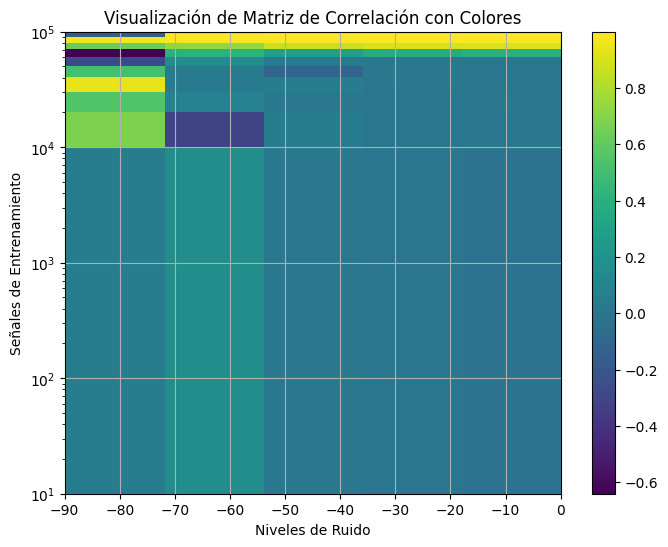

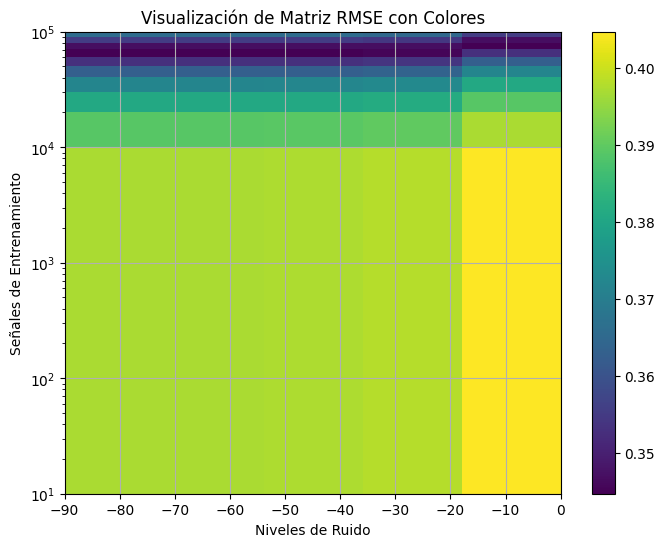

In [15]:
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis', extent=[noise_levels.min(), noise_levels.max(), training_signals.min(), training_signals.max()], aspect='auto')
plt.colorbar()
plt.title('Visualización de Matriz de Correlación con Colores')
plt.xlabel('Niveles de Ruido')
plt.ylabel('Señales de Entrenamiento')
plt.xticks(np.round(np.linspace(noise_levels.min(), noise_levels.max(), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.yticks(np.round(np.logspace(np.log10(training_signals.min()), np.log10(training_signals.max()), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.xscale('linear')  # O 'log' si noise_levels es logarítmico
plt.yscale('log')  # Si training_signals es logarítmico
plt.grid(True)
plt.show()

# Visualización de rmse_matrix
plt.figure(figsize=(8, 6))
plt.imshow(rmse_matrix, cmap='viridis', extent=[noise_levels.min(), noise_levels.max(), training_signals.min(), training_signals.max()], aspect='auto')
plt.colorbar()
plt.title('Visualización de Matriz RMSE con Colores')
plt.xlabel('Niveles de Ruido')
plt.ylabel('Señales de Entrenamiento')
plt.xticks(np.round(np.linspace(noise_levels.min(), noise_levels.max(), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.yticks(np.round(np.logspace(np.log10(training_signals.min()), np.log10(training_signals.max()), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.xscale('linear')  # O 'log' si noise_levels es logarítmico
plt.yscale('log')  # Si training_signals es logarítmico
plt.grid(True)
plt.show()